Clustering

Clustering is an unsupervised learning technique that groups similar data points together It helps discover patterns and structures in data without labeled outputs Applications: Customer segmentation, anomaly detection, document categorization, image segmentation. K-Means clustering

A partition-based clustering method. It divides data into K clusters, where each cluster has a centroid. Data points are assigned to the nearest centroid. The goal is to minimize the intra-cluster variance.

In [10]:
#K-Means – Mall Customers
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Tweets.csv")
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [11]:
df.isnull().sum() #check misssing values

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [49]:
df = df.dropna(subset=["text"])

Since K-Means cannot handle missing values and text data cannot be meaningfully imputed, rows with missing text were removed. As the number of missing observations was negligible, this preprocessing step does not affect the clustering results.

TF-IDF Vectorization is applied because the dataset contains text data, which cannot be directly used by clustering algorithms.  
Clustering methods such as K-Means require numerical features to compute distances between samples.  
TF-IDF converts text into numerical vectors that represent the importance of words in each document, making clustering possible.


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

texts = df["text"]
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.9, min_df=5)
X = vectorizer.fit_transform(df["text"])

# #k-means clustering
# the TF-IDF vectors are normalized so scaling is not necessary

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# K-Means: Starts from random initial centroids Can converge to local minima
# n_init=10 means:Run K-Means 10 times Keep the best solution. 
# improves stability and reliability

K-Means uses Euclidean distance.
But in text analysis: We care more about direction than magnitude. That means cosine similarity is more natural

Example: Two tweets using the same words but different lengths
Cosine → similar
Euclidean → possibly far apart

TF-IDF vectors are L2-normalized by default.
That means:
All vectors have length ≈ 1
Euclidean distance between them becomes closely related to cosine distance
So in practice: K-Means on TF-IDF ≈ clustering by cosine similarity

LIMITATIONS: K-Means assumes spherical clusters

Text data is often:
- Sparse
- High-dimensional
- Not well separated
Results depend on:
- k
- Initialization

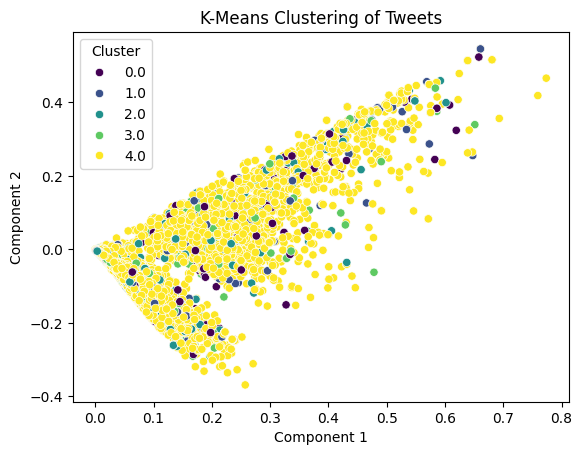

In [54]:
#VISUALIZATION
#it is not possible to plot TF-IDF directly so
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

svd = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd.fit_transform(X_scaled)

plot_df = pd.DataFrame(X_2d, columns=["Component 1", "Component 2"])
plot_df["Cluster"] = df["Cluster"]

sns.scatterplot(data=plot_df,x="Component 1",y="Component 2",hue="Cluster",palette="viridis")

plt.title("K-Means Clustering of Tweets")
plt.show()


In [23]:
#CLUSTER ANALYSIS
import numpy as np

terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(5):
    print(f"\nCluster {i}:")
    top_words = [terms[ind] for ind in order_centroids[i, :10]]
    print(", ".join(top_words))

# extracting the most representative words per cluster.



Cluster 0:
know, got, don, just, like, think, lol, good, work, love

Cluster 1:
day, happy, mother, mothers, mom, moms, wars, star, love, good

Cluster 2:
good, just, work, like, going, today, love, lol, http, day

Cluster 3:
time, want, work, just, don, really, good, bed, home, great

Cluster 4:
looking, forward, look, good, just, seeing, really, today, tomorrow, day


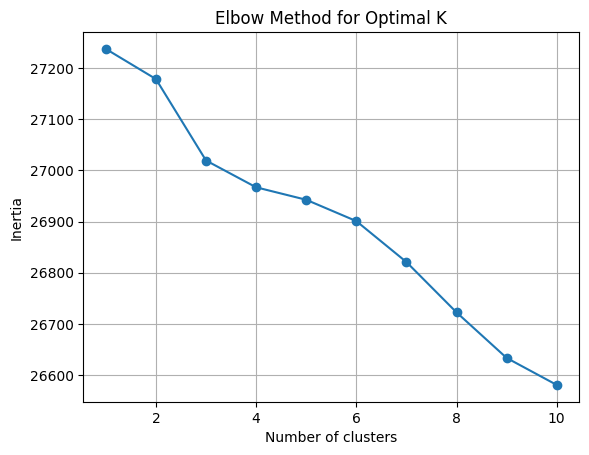

In [24]:
#elbow method
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

#The elbow method provides a heuristic, but in text data the curve is often smooth due to high dimensionality.

The same K-Means clustering pipeline used for numerical customer data was adapted for text data by first transforming text into numerical TF-IDF vectors. Since TF-IDF features are already normalized, additional scaling was not required. Dimensionality reduction was applied only for visualization and interpretation purposes.